In [29]:
import numpy as np
import Fourier_Approximation as FA
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import librosa
import soundfile as sf
from scipy.fft import fft, fftfreq, ifft, fft2, fftshift, ifft2, ifftshift

## Aufgabe 1: Fourier-Approximation in numpy

### (a) Implementierung der k-ten Fourier-Komponente
Implementieren Sie mit numpy eine Methode zur Berechnung der k-ten Fourier-Komponente einer Funktion, gegeben durch arrays `x` und `y`, mithilfe der Trapezregel (`np.trapz`).

In [2]:
x_values = np.linspace(0, 2 , 100)
y_values = np.sin(x_values)
k_index = 1

In [3]:
dx = x_values[2] - x_values[0]
np.trapz(x=x_values, y=y_values, dx= dx )

1.4160986728744112

In [4]:
component = FA.compute_fourier_component(x_values, y_values, k_index)
print(component)

(-0.15971108194513575+0.3219738093106199j)


### (b) Fourier-Approximation
Implementieren Sie mit numpy eine Methode zur Berechnung der Fourier-Approximation `fapp` mit einer gegebenen Anzahl (2m + 1) von Fourier-Komponenten.

In [5]:
m_value = 3
fapp = FA.fourier_approximation(x_values, y_values, m_value)
print(fapp)

[0.99062751 0.87723955 0.76955893 0.66952775 0.57891021 0.49924425
 0.43180017 0.37754768 0.33713223 0.31086153 0.29870248 0.30028866
 0.3149379  0.34167948 0.37928966 0.4263346  0.48121895 0.54223844
 0.60763479 0.67565092 0.74458475 0.81283961 0.87896984 0.94171995
 1.00005618 1.05318952 1.10058957 1.14198897 1.17737835 1.20699237
 1.23128729 1.25091133 1.26666887 1.27948001 1.29033707 1.30025968
 1.31025027 1.32125148 1.33410724 1.34952874 1.36806673 1.39009093
 1.41577739 1.44510398 1.47785432 1.51362967 1.55186833 1.59187168
 1.63283571 1.67388678 1.71412017 1.7526397  1.78859704 1.82122886
 1.84989054 1.87408491 1.8934849  1.90794914 1.91752986 1.92247267
 1.92320812 1.92033551 1.91459914 1.90685828 1.89805161 1.88915765
 1.88115271 1.87496783 1.87144644 1.87130454 1.8750947  1.88317562
 1.89568843 1.91254067 1.93339887 1.95769015 1.98461288 2.01315633
 2.04212875 2.07019297 2.09590846 2.1177785  2.13430077 2.14401974
 2.14557904 2.13777196 2.1195882  2.09025541 2.04927376 1.9964

### (c) Näherung der Funktion f1(x)
Nähern Sie die Funktion \( f_1(x) = \frac{1}{e^x + e^{-x}} \) auf dem Intervall \([-3, 3]\) (Auflösung: N = 600 Schritte) mit verschiedenen Anzahlen von Komponenten (2m + 1). Plotten Sie den Vergleich zur Originalfunktion `f`.

In [6]:
x_values = np.linspace(-3, 3, 600)
y_values_f1 = FA.f1(x_values)
m_values = [1, 3, 5, 10]

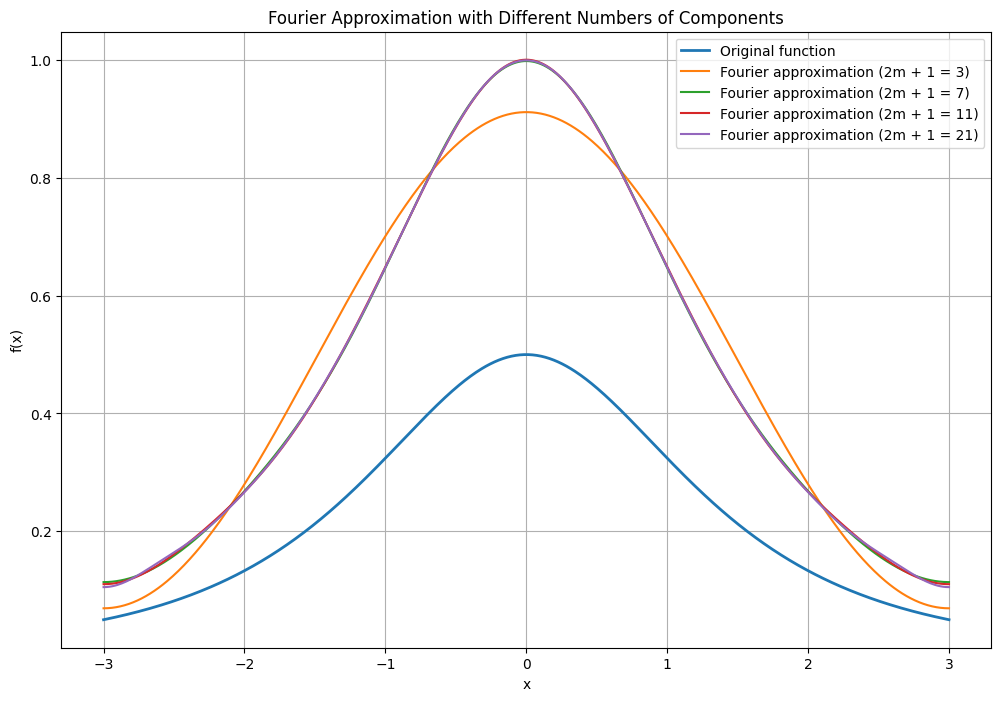

In [7]:
FA.plot_fourier_approximations(x_values, y_values_f1, m_values)

### (d) Bestimmung der Anzahl der Fourier-Komponenten
Bestimmen Sie die Anzahl der Fourier-Komponenten, die benötigt werden, um eine Approximation mit höchstens 0,1% relativen Fehler zu erhalten.

M_Value: 1, Relative Error: 1.3074588316532159
M_Value: 2, Relative Error: 1.712431344288959
Relative error increased at m = 2. Stopping early.


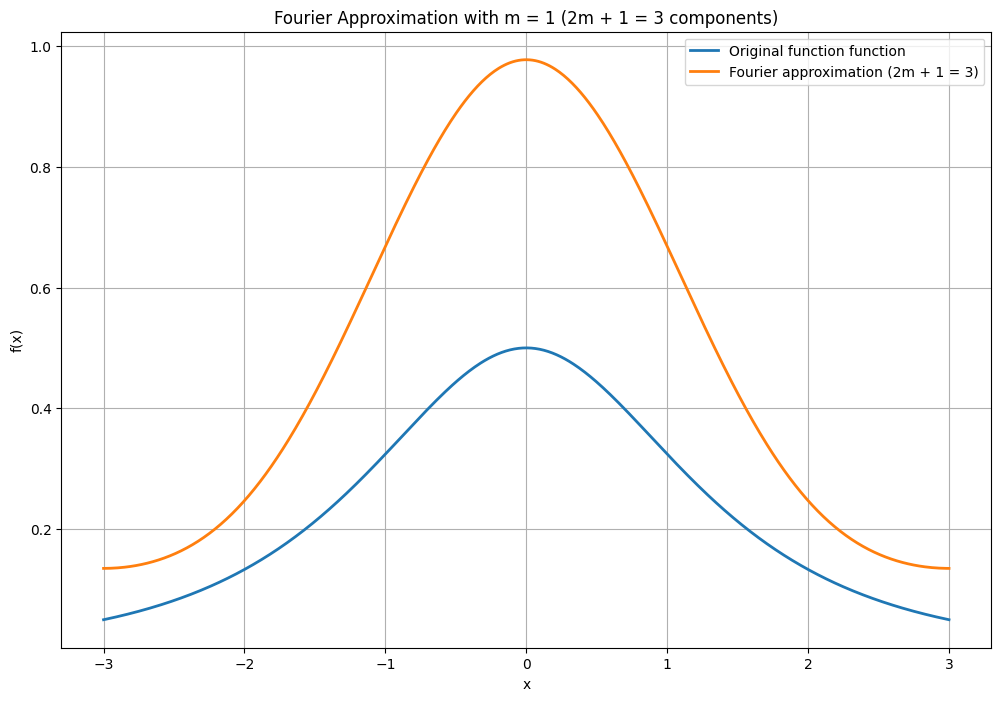

Optimal m_value for f1(x): 1


In [8]:
tolerance = 1
m_value_f1 = FA.find_fourier_components_for_error_tolerance(x_values, y_values_f1, tolerance)
print("Optimal m_value for f1(x):", m_value_f1)

### (e) Näherung weiterer Funktionen
Versuchen Sie die Funktionen \( f_2(x) = e^x \) und \( f_3(x) = e^{|x|} \) auf dem Intervall \([-3, 3]\) (Auflösung: N = 600 Schritte) mit einem 0,1%igen Approximationsfehler anzunähern. Beschreiben und erklären Sie die Unterschiede.

M_Value: 1, Relative Error: 261.1072595000662
M_Value: 2, Relative Error: 310.91667219604125
Relative error increased at m = 2. Stopping early.


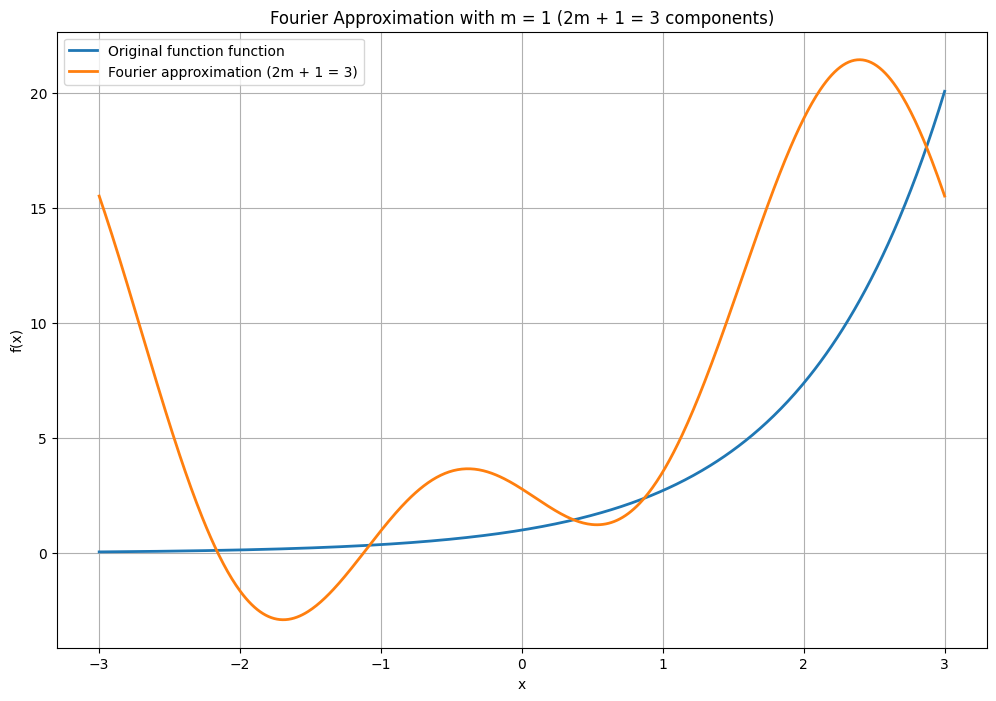

Optimal m_value for f2(x): 1


In [9]:
y_values_f2 = FA.f2(x_values)
m_value_f2 = FA.find_fourier_components_for_error_tolerance(x_values, y_values_f2, tolerance)
print("Optimal m_value for f2(x):", m_value_f2)

M_Value: 1, Relative Error: 1.8520455745589306
M_Value: 2, Relative Error: 3.0186537813224885
Relative error increased at m = 2. Stopping early.


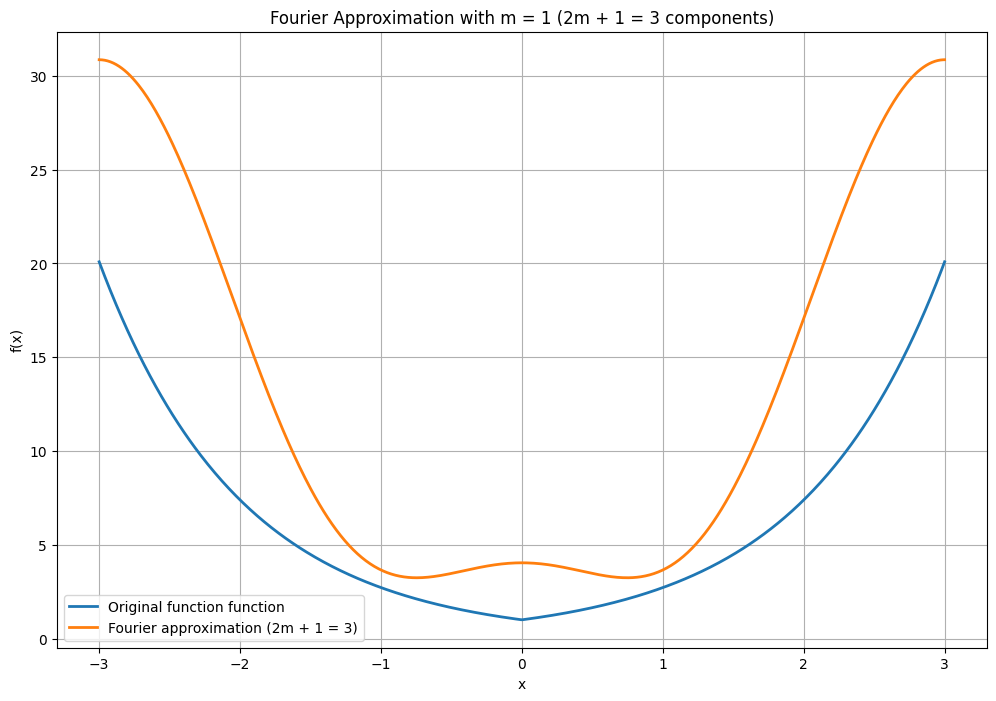

Optimal m_value for f3(x): 1


In [11]:
y_values_f3 = FA.f3(x_values)
m_value_f3 = FA.find_fourier_components_for_error_tolerance(x_values, y_values_f3, tolerance)
print("Optimal m_value for f3(x):", m_value_f3)

## Aufgabe 2: Fourier-Analyse von Sonnenfleckendaten

### (a) Power-Spektrum und Periodizität
Plotten Sie das Power-Spektrum und finden Sie die dominante Periodizität der Schwingung. Damit erhalten Sie eine Abschätzung auf die Dauer des Sonnenzyklus.

In [95]:
with open("./data_mc2/sunspots.txt") as file:
    sunspots_file = file.readlines()

In [96]:
sunspots_data = [(element.strip("\n")).split("\t") for element in sunspots_file]
time_step = []
sunspots_values = []

for element in sunspots_data:
    for index, value in enumerate(element):
        if index % 2 == 0:
            time_step.append(int(value))
        else:
            sunspots_values.append(float(value))


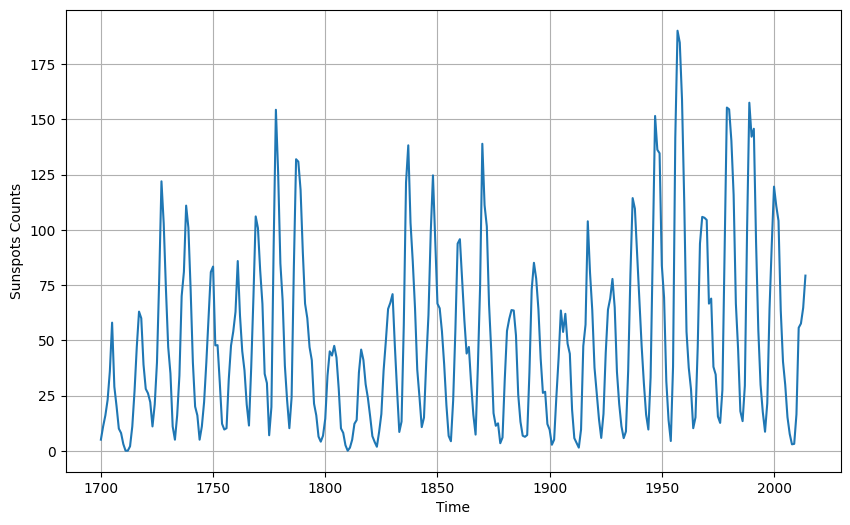

In [93]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Sunspots Counts")
    plt.grid(True)

series = np.array(sunspots_values)
time = np.array(time_step)
plt.figure(figsize=(10, 6))
plot_series(time, series)

Das Diagramm zeigt die Anzahl der Sonnenflecken im Verlauf der Jahre und hebt ein offensichtliches zyklisches Muster hervor. Dieser periodische Anstieg und Rückgang der Sonnenfleckenanzahl ist mit dem Sonnenzyklus verbunden, einem ungefähr 11-jährigen Zyklus, während dessen die magnetische Aktivität der Sonne schwankt

### (b) Weitere Perioden in den Sonnenfleck-Daten
Können Sie weitere Perioden in den Sonnenfleck-Daten mithilfe des Fourier-Spektrums finden?

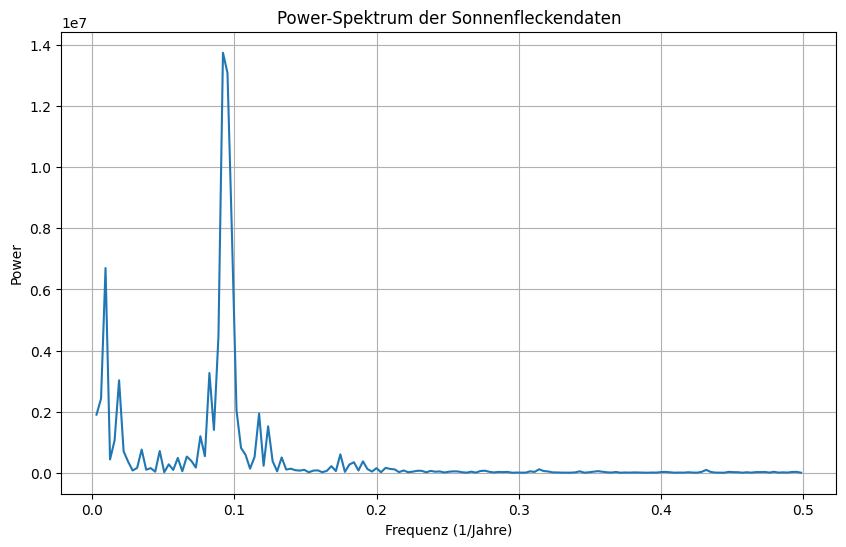

Dominante Frequenz: 0.0921 1/Jahre
Dominante Periode: 10.86 Jahre


In [100]:
years = time_step
sunspots = sunspots_values

# FFT anwenden
N = len(sunspots)
T = 1 # Zeitintervall zwischen den Messungen

# FFT der Sonnenfleckendaten
fft_values = fft(sunspots)[1:]
frequencies = fftfreq(N, T)[1:]

# Power-Spektrum berechnen
power_spectrum = np.abs(fft_values) ** 2

# Plotten des Power-Spektrums
plt.figure(figsize=(10, 6))
plt.plot(
    frequencies[: N // 2], power_spectrum[: N // 2]
)  # Plot der positiven Frequenzen
plt.title("Power-Spektrum der Sonnenfleckendaten")
plt.xlabel("Frequenz (1/Jahre)")
plt.ylabel("Power")
plt.grid()
plt.show()

# Dominante Frequenz finden
# Index der maximalen Amplitude im Power-Spektrum
dominant_frequency_index = np.argmax(power_spectrum[: N // 2])
dominant_frequency = frequencies[dominant_frequency_index]

# Periode berechnen (Periode = 1 / Frequenz)
dominant_period = 1 / dominant_frequency

print(f"Dominante Frequenz: {dominant_frequency:.4f} 1/Jahre")
print(f"Dominante Periode: {dominant_period:.2f} Jahre")

### (c) Komponenten entfernen und Rücktransformation
Entfernen Sie einige Komponenten im Fourier-Spektrum und führen dann eine Rücktransformation durch:
- Größten Komponenten entfernen (k > 20)
- Kleinsten Komponenten entfernen (k < 5)
Beschreiben und erklären Sie die Ergebnisse.

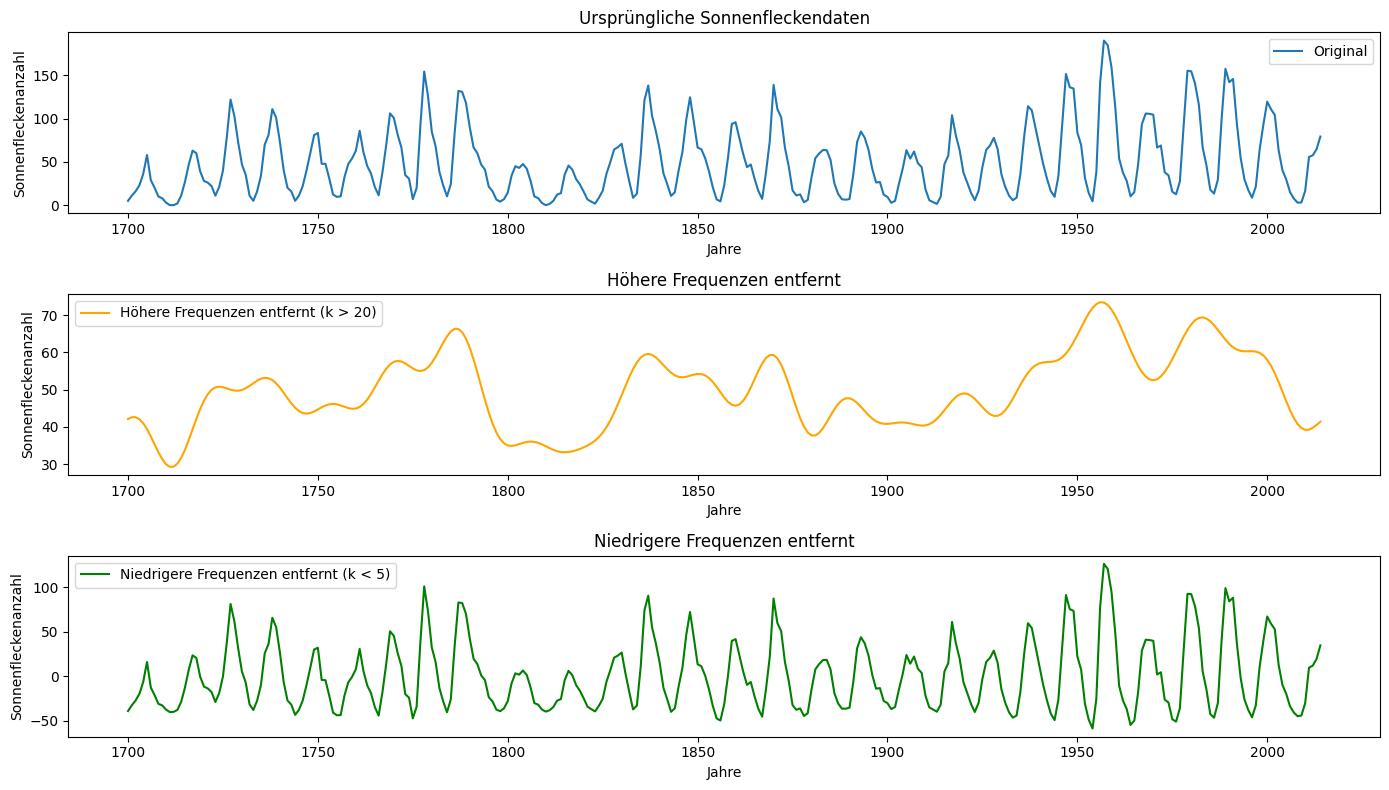

In [106]:
fft_high_removed = fft_values.copy()
fft_low_removed = fft_values.copy()

# Größte Komponenten entfernen (k > 20)
fft_high_removed[20:] = 0

# Kleinste Komponenten entfernen (k < 5)
fft_low_removed[:5] = 0

# Rücktransformation durchführen
sunspots_high_removed = ifft(fft_high_removed)
sunspots_low_removed = ifft(fft_low_removed)

# Ursprüngliche und modifizierte Zeitreihen plotten
plt.figure(figsize=(14, 8))

plt.subplot(3, 1, 1)
plt.plot(years, sunspots, label="Original")
plt.title("Ursprüngliche Sonnenfleckendaten")
plt.xlabel("Jahre")
plt.ylabel("Sonnenfleckenanzahl")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(
    years,
    sunspots_high_removed,
    label="Höhere Frequenzen entfernt (k > 20)",
    color="orange",
)
plt.title("Höhere Frequenzen entfernt")
plt.xlabel("Jahre")
plt.ylabel("Sonnenfleckenanzahl")
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(
    years,
    sunspots_low_removed,
    label="Niedrigere Frequenzen entfernt (k < 5)",
    color="green",
)
plt.title("Niedrigere Frequenzen entfernt")
plt.xlabel("Jahre")
plt.ylabel("Sonnenfleckenanzahl")
plt.legend()

plt.tight_layout()
plt.show()

### (d) Vergleich der Ergebnisse
Vergleichen Sie die Ergebnisse mit denen aus Aufgabe 1. Beschreiben und erklären Sie Unterschiede in den Fourier-Koeffizienten.

## Aufgabe 3: Analyse eines Musikstücks

### (a) Wellenform und Amplitudenspektrum
Plotten Sie die Wellenform des Klangs (waveplot) - einmal vollständig und einmal für einen kleinen Zeitbereich, sodass die Wellenform deutlich wird - sowie das Amplitudenspektrum. Wieso ist das Amplitudenspektrum symmetrisch bezüglich des Vorzeichens?

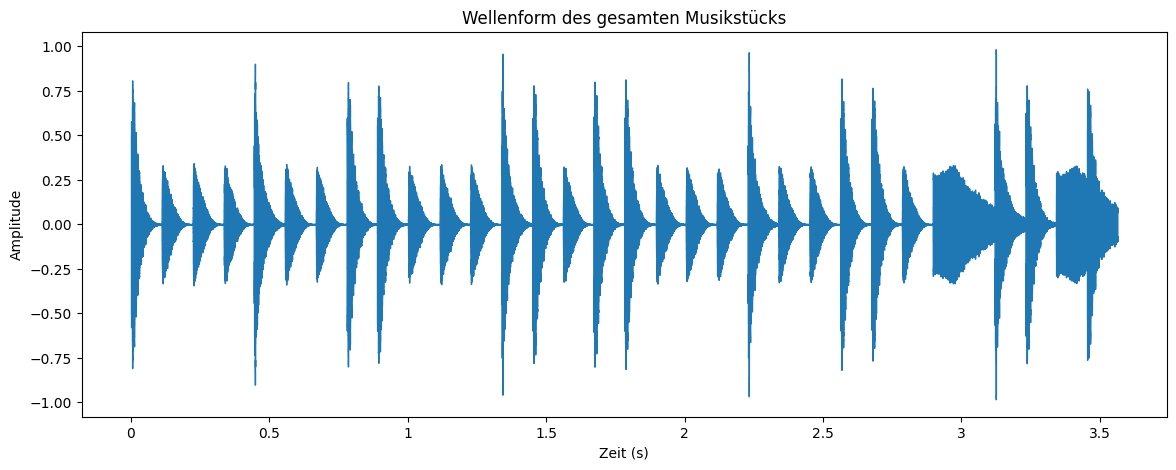

In [6]:
filename = "./data_mc2/music.wav"
y, sr = librosa.load(filename, sr=None)

# Wellenform plotten (vollständig)
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
plt.title("Wellenform des gesamten Musikstücks")
plt.xlabel("Zeit (s)")
plt.ylabel("Amplitude")
plt.show()

Kleinen Zeitbereich

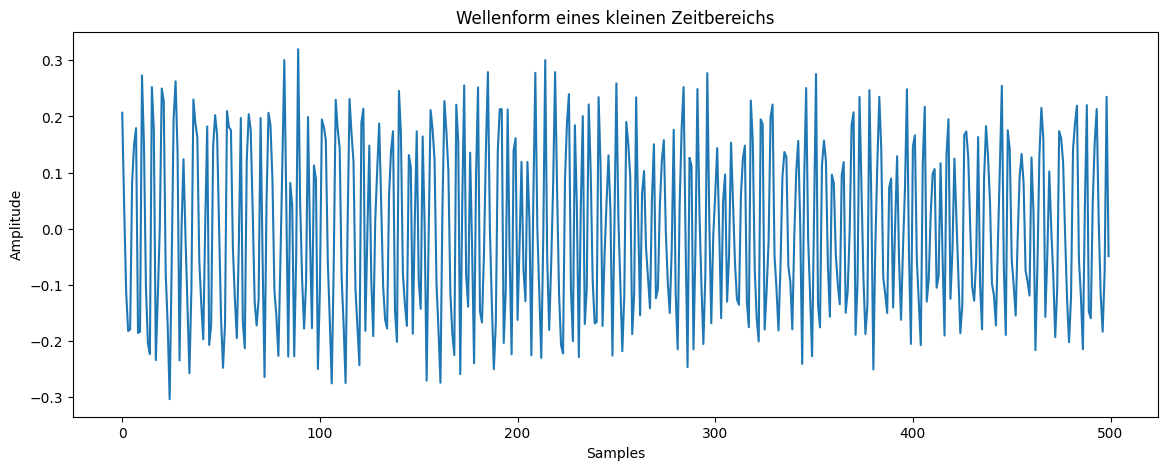

In [7]:
# Auswahl eines kleinen Zeitbereichs
start_sample = 10000
end_sample = 10500

# Wellenform plotten (kleiner Zeitbereich)
plt.figure(figsize=(14, 5))
plt.plot(y[start_sample:end_sample])
plt.title("Wellenform eines kleinen Zeitbereichs")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.show()

Amplitudspektrum

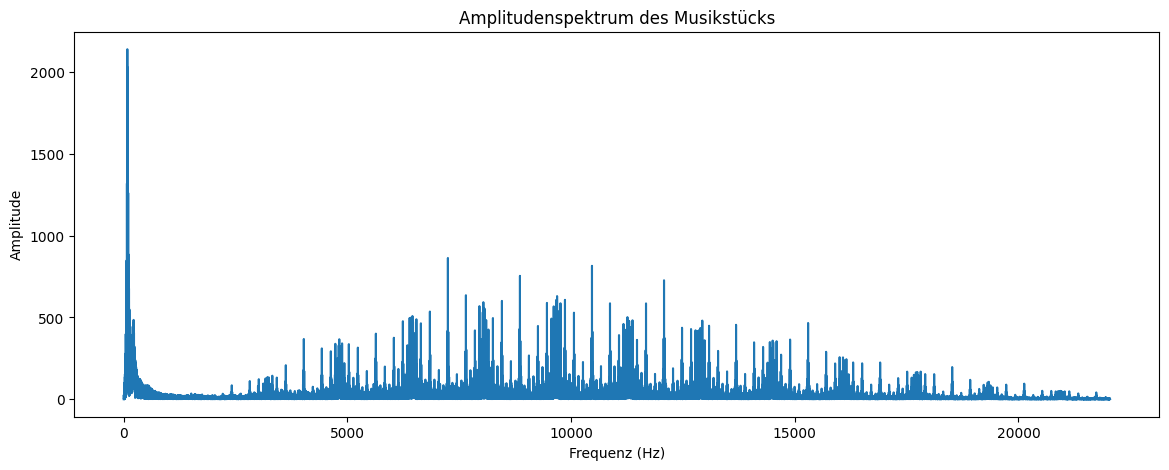

In [9]:
# FFT berechnen
N = len(y)
Y = fft(y)

# Frequenzachse berechnen
frequencies = np.fft.fftfreq(N, 1 / sr)

# Amplitudenspektrum plotten
plt.figure(figsize=(14, 5))
plt.plot(
    frequencies[: N // 2], np.abs(Y[: N // 2])
)  # nur die positiven Frequenzen plotten
plt.title("Amplitudenspektrum des Musikstücks")
plt.xlabel("Frequenz (Hz)")
plt.ylabel("Amplitude")
plt.show()

### (b) Trennung des Sound-Signals
Trennen Sie das Sound-Signal in einen Teil oberhalb und unterhalb von 2 kHz in Frequenzen. Identifizieren Sie jeweils die Top 5 Frequenzen in diesen Frequenzbereichen.

Berechnung der Fourier Transform

In [11]:
# FFT berechnen
N = len(y)
Y = fft(y)

# Frequenzachse berechnen
frequencies = np.fft.fftfreq(N, 1 / sr)

# Trennen der Frequenzen
threshold = 2000  # 2 kHz
positive_frequencies = frequencies[: N // 2]
positive_Y = Y[: N // 2]

# Indizes der Frequenzen unterhalb und oberhalb von 2 kHz
indices_below_threshold = np.where(positive_frequencies < threshold)[0]
indices_above_threshold = np.where(positive_frequencies >= threshold)[0]

# Spektrum unterhalb von 2 kHz
frequencies_below_threshold = positive_frequencies[indices_below_threshold]
amplitudes_below_threshold = np.abs(positive_Y[indices_below_threshold])

# Spektrum oberhalb von 2 kHz
frequencies_above_threshold = positive_frequencies[indices_above_threshold]
amplitudes_above_threshold = np.abs(positive_Y[indices_above_threshold])

# Top-5 Frequenzen unterhalb von 2 kHz
top_5_below_indices = np.argsort(amplitudes_below_threshold)[-5:][::-1]
top_5_frequencies_below = frequencies_below_threshold[top_5_below_indices]
top_5_amplitudes_below = amplitudes_below_threshold[top_5_below_indices]

# Top-5 Frequenzen oberhalb von 2 kHz
top_5_above_indices = np.argsort(amplitudes_above_threshold)[-5:][::-1]
top_5_frequencies_above = frequencies_above_threshold[top_5_above_indices]
top_5_amplitudes_above = amplitudes_above_threshold[top_5_above_indices]

# Ausgabe der Ergebnisse
print("Top 5 Frequenzen unterhalb von 2 kHz:")
for freq, amp in zip(top_5_frequencies_below, top_5_amplitudes_below):
    print(f"Frequenz: {freq:.2f} Hz, Amplitude: {amp:.2f}")

print("\nTop 5 Frequenzen oberhalb von 2 kHz:")
for freq, amp in zip(top_5_frequencies_above, top_5_amplitudes_above):
    print(f"Frequenz: {freq:.2f} Hz, Amplitude: {amp:.2f}")

Top 5 Frequenzen unterhalb von 2 kHz:
Frequenz: 80.81 Hz, Amplitude: 2138.61
Frequenz: 81.93 Hz, Amplitude: 2116.92
Frequenz: 89.79 Hz, Amplitude: 2027.00
Frequenz: 90.91 Hz, Amplitude: 1950.65
Frequenz: 71.83 Hz, Amplitude: 1318.57

Top 5 Frequenzen oberhalb von 2 kHz:
Frequenz: 7246.89 Hz, Amplitude: 863.01
Frequenz: 10467.69 Hz, Amplitude: 815.16
Frequenz: 8857.43 Hz, Amplitude: 753.93
Frequenz: 12078.24 Hz, Amplitude: 726.83
Frequenz: 7649.52 Hz, Amplitude: 635.46


### (c) Rekonstruktion der gefilterten Signale
Berechnen Sie aus diesen beiden Teilen jeweils eine Rekonstruktion. Berechnen Sie den Fehler der Rekonstruktion wie in Aufgabe 1 für die gefilterten Signale und schreiben Sie die gefilterten rekonstruierten Daten in eine wav-Datei. Beschreiben und erklären Sie das Ergebnis.

Fehler der Rekonstruktion für Frequenzen unterhalb von 2 kHz: 0.00873
Fehler der Rekonstruktion für Frequenzen oberhalb von 2 kHz: 0.00988


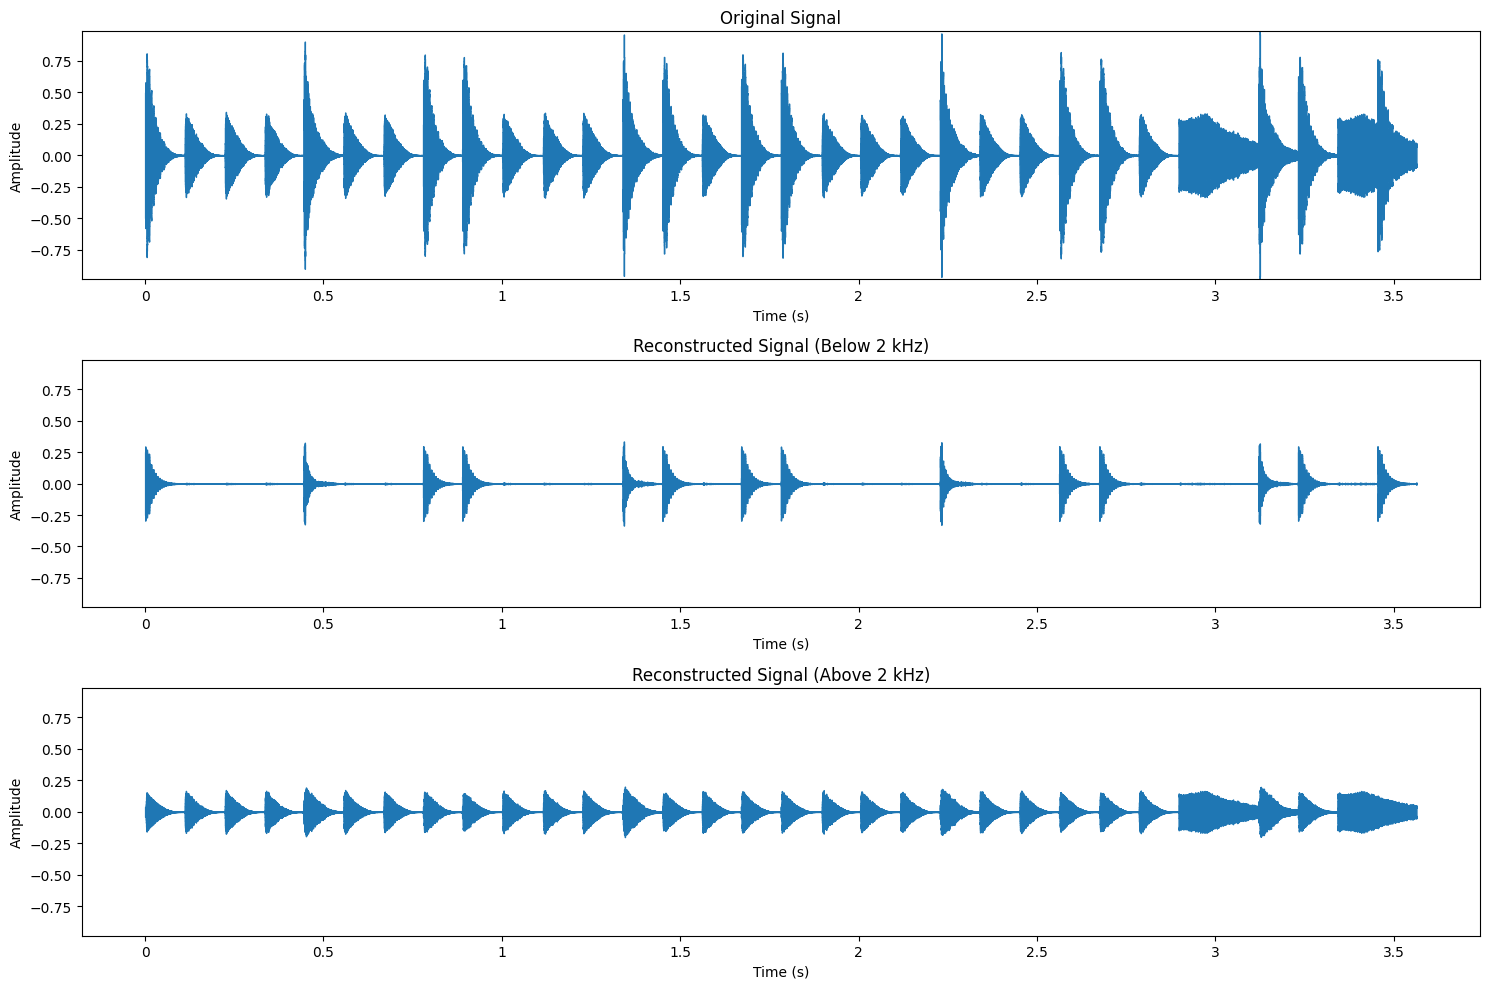

In [19]:
# Frequenzen unterhalb von 2 kHz rekonstrukieren
Y_below_threshold = np.zeros_like(Y)
Y_below_threshold[indices_below_threshold] = Y[indices_below_threshold]
y_below_reconstructed = np.real(ifft(Y_below_threshold))

# Speichern der rekonstruierten Daten in eine WAV-Datei
sf.write("reconstructed_below_2kHz.wav", y_below_reconstructed, sr)

# Frequenzen oberhalb von 2 kHz rekonstrukieren
Y_above_threshold = np.zeros_like(Y)
Y_above_threshold[indices_above_threshold] = Y[indices_above_threshold]
y_above_reconstructed = np.real(ifft(Y_above_threshold))

# Speichern der rekonstruierten Daten in eine WAV-Datei
sf.write("reconstructed_above_2kHz.wav", y_above_reconstructed, sr)

# Berechnung des Fehlers für die Rekonstruktion unterhalb von 2 kHz
mse_below = np.mean((y - y_below_reconstructed) ** 2)
print(f"Fehler der Rekonstruktion für Frequenzen unterhalb von 2 kHz: {mse_below:.5f}")

# Berechnung des Fehlers für die Rekonstruktion oberhalb von 2 kHz
mse_above = np.mean((y - y_above_reconstructed) ** 2)
print(f"Fehler der Rekonstruktion für Frequenzen oberhalb von 2 kHz: {mse_above:.5f}")

# Determine common amplitude scale
max_amplitude = max(np.max(np.abs(y)), np.max(np.abs(y_below_reconstructed)), np.max(np.abs(y_above_reconstructed)))

# Plot the original and reconstructed signals with consistent amplitude scaling
plt.figure(figsize=(15, 10))

# Original signal plot
plt.subplot(3, 1, 1)
librosa.display.waveshow(y, sr=sr)
plt.ylim(-max_amplitude, max_amplitude)
plt.title('Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Reconstructed signal below 2 kHz
plt.subplot(3, 1, 2)
librosa.display.waveshow(y_below_reconstructed, sr=sr)
plt.ylim(-max_amplitude, max_amplitude)
plt.title('Reconstructed Signal (Below 2 kHz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Reconstructed signal above 2 kHz
plt.subplot(3, 1, 3)
librosa.display.waveshow(y_above_reconstructed, sr=sr)
plt.ylim(-max_amplitude, max_amplitude)
plt.title('Reconstructed Signal (Above 2 kHz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

## Aufgabe 4: Analyse einer Bilddatei

### (a) 2D-Verteilung der Fourier-Komponenten
Plotten Sie die 2D-Verteilung der absoluten Werte der Fourier-Komponenten, sodass die kleinsten k-Werte in der Mitte liegen. Erklären Sie die Natur der Verteilung.

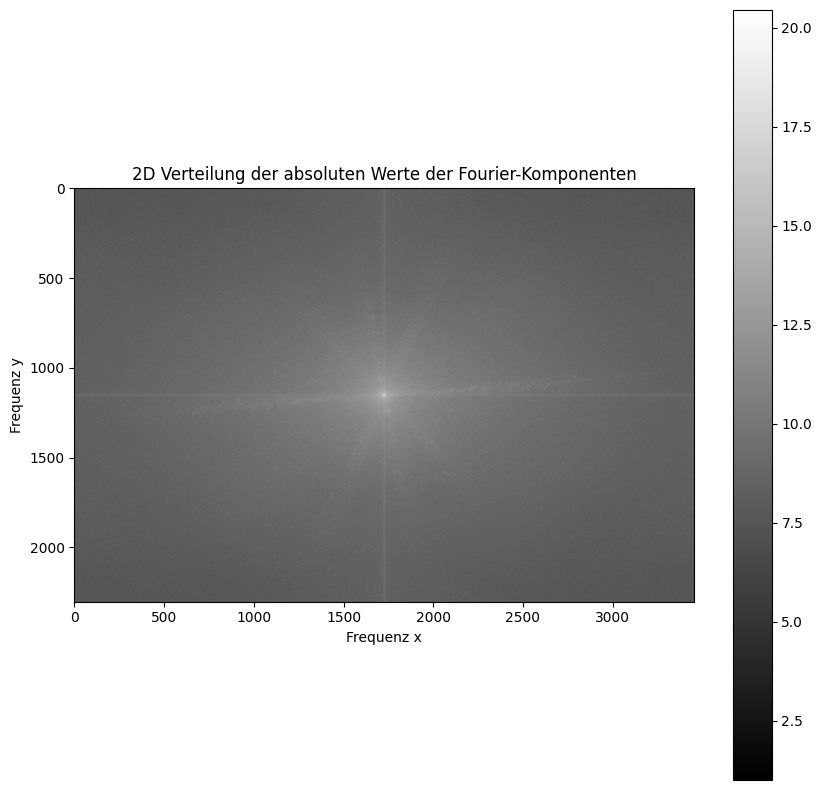

In [26]:
# Bild laden
img = mpimg.imread("./data_mc2/img.jpg")

# Falls das Bild in Farbe ist, konvertieren wir es in Graustufen
if img.ndim == 3:
    img = np.mean(img, axis=2)

# 2D Fourier-Transformation berechnen
F = fft2(img)
F_shifted = fftshift(F)
magnitude_spectrum = np.abs(F_shifted)

# Plotten der 2D-Verteilung der absoluten Werte
plt.figure(figsize=(10, 10))
plt.imshow(np.log1p(magnitude_spectrum), cmap="gray")
plt.colorbar()
plt.title("2D Verteilung der absoluten Werte der Fourier-Komponenten")
plt.xlabel("Frequenz x")
plt.ylabel("Frequenz y")
plt.show()

### (b) Entfernen der Fourier-Komponenten
Entfernen Sie je die Fourier-Komponenten mit absoluter Amplitude unter dem Schwellenwert 0.001%, 0.01%, 0.1%, 1% und 10% der maximalen Amplitude. Führen Sie eine inverse Fourier-Transformation durch und stellen Sie die gefilterten Fourierkomponenten sowie die resultierenden Bilder dar. Beschreiben und erklären Sie die Unterschiede.

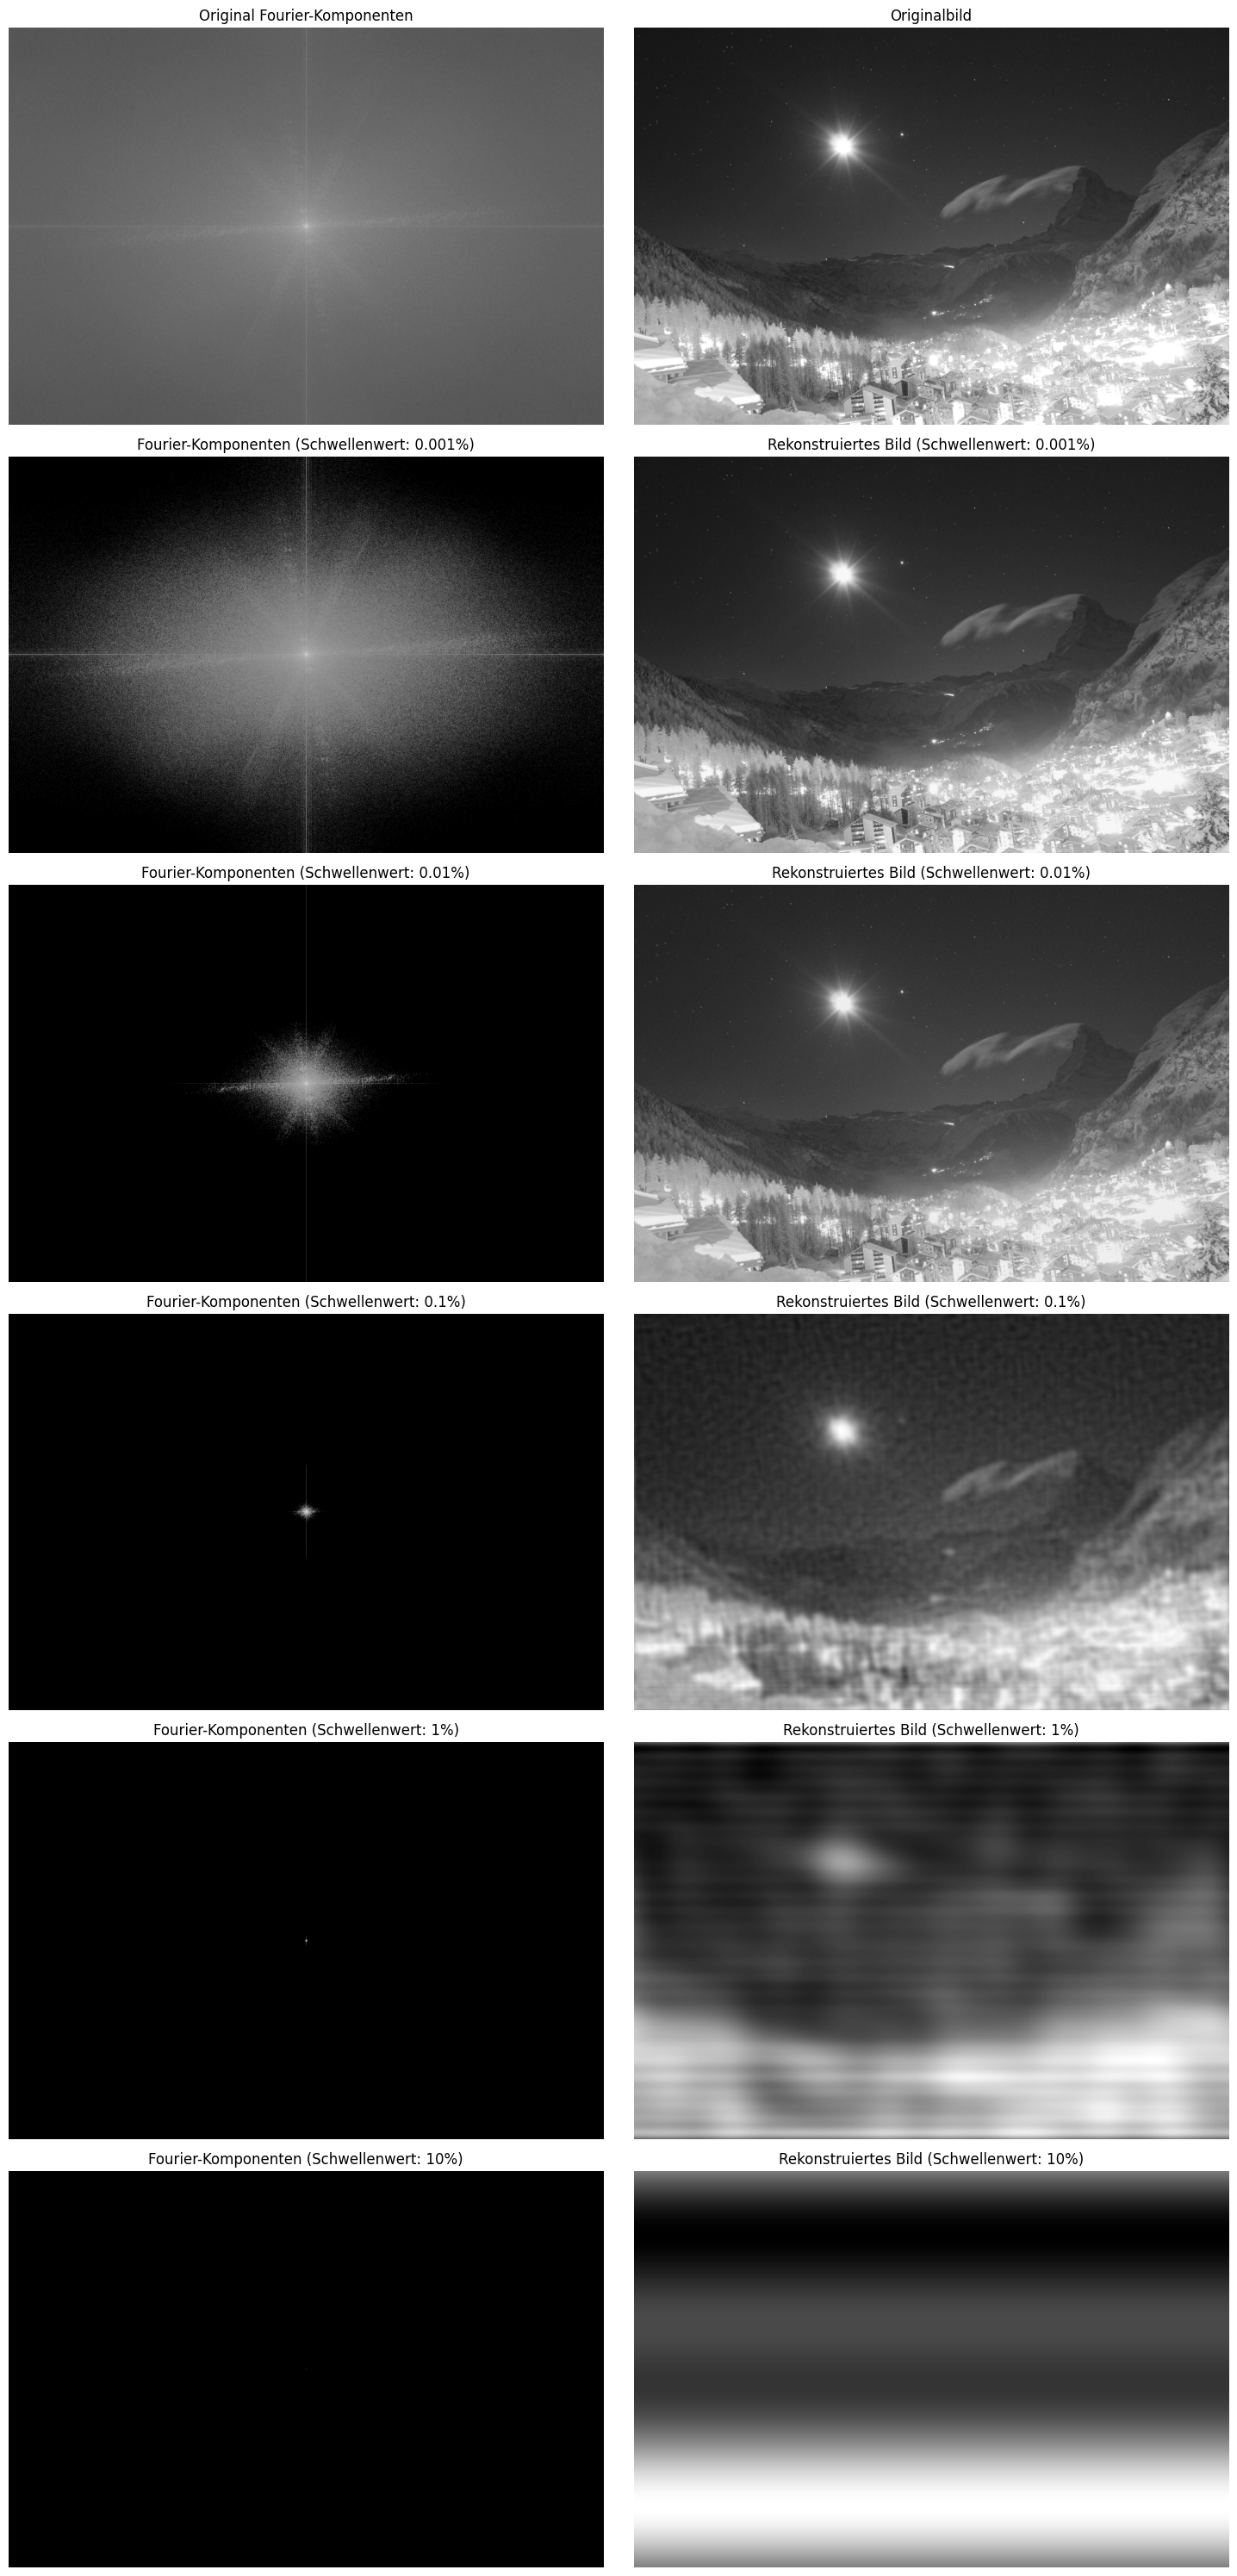

In [30]:
# Schwellenwerte als Prozentsätze der maximalen Amplitude
thresholds = [0.001, 0.01, 0.1, 1, 10]
max_amplitude = np.max(magnitude_spectrum)

# Vorbereitung für das Plotten
fig, axes = plt.subplots(len(thresholds) + 1, 2, figsize=(15, 30))

# Plot des Original-Fourier-Spektrums
axes[0, 0].imshow(np.log1p(magnitude_spectrum), cmap="gray")
axes[0, 0].set_title("Original Fourier-Komponenten")
axes[0, 0].axis("off")

# Plot des Originalbilds
axes[0, 1].imshow(img, cmap="gray")
axes[0, 1].set_title("Originalbild")
axes[0, 1].axis("off")

# Anwendung der Schwellenwerte und inverse Fourier-Transformation
for i, threshold_percentage in enumerate(thresholds):
    threshold_value = max_amplitude * (threshold_percentage / 100)
    F_filtered = F_shifted * (magnitude_spectrum >= threshold_value)

    # Inverse Fourier-Transformation
    F_ifftshift = ifftshift(F_filtered)
    img_filtered = np.real(ifft2(F_ifftshift))

    # Plot des gefilterten Fourier-Spektrums
    magnitude_filtered = np.abs(F_filtered)
    axes[i + 1, 0].imshow(np.log1p(magnitude_filtered), cmap="gray")
    axes[i + 1, 0].set_title(
        f"Fourier-Komponenten (Schwellenwert: {threshold_percentage}%)"
    )
    axes[i + 1, 0].axis("off")

    # Plot des resultierenden Bildes
    axes[i + 1, 1].imshow(img_filtered, cmap="gray")
    axes[i + 1, 1].set_title(
        f"Rekonstruiertes Bild (Schwellenwert: {threshold_percentage}%)"
    )
    axes[i + 1, 1].axis("off")

plt.tight_layout()
plt.show()

### (c) Fehlerberechnung und Kompression
Berechnen Sie den Fehler (Aufgabe 1) zwischen rekonstruiertem und Originalbild. Wie weit können die Daten komprimiert werden, ohne einen Fehler von höchstens 1% zu überschreiten?